# 1.7:  A First Application:  Classifying Iris Species

These are the import required.   All but the last are used throughout the book.
For this section we are going to use machine learning to create an applciation that can recognize species of iris from a few parameters.

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
from sklearn.datasets import load_iris

## 1.7.1:  Meet the Data

Here is what the dataset looks like.

In [26]:
iris_dataset = load_iris()

iris_dataset['target']
print('Keys of iris_dataset:\n', iris_dataset.keys())
print(75*'*')
print(iris_dataset['DESCR'][:200] + '\n...')
print(75*'*')
print("Target names:", iris_dataset['target_names'])
print(75*'*')
print("Feature names:", iris_dataset['feature_names'])
print(75*'*')
print("Type of data:", type(iris_dataset['data']))
print(75*'*')
print("Shape of data:", iris_dataset['data'].shape)
print(75*'*')
print("first ten rows of data:", iris_dataset['data'][:10])
print(75*'*')
print("Type of target:", type(iris_dataset['target']))
print(75*'*')
print("Shape of target:", iris_dataset['target'].shape)
print(75*'*')
print("Target:\n", iris_dataset['target'])
print("Length of target:\n", len(iris_dataset['target']))
print(75*'*')

# We create a dictionary for the names of the irises
name = dict(zip(range(3), iris_dataset['target_names']))
print(f'Meaning of numbers\n0 means {name[0]}, 1 means {name[1]}, and 2 means {name[2]}')

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
***************************************************************************
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive
...
***************************************************************************
Target names: ['setosa' 'versicolor' 'virginica']
***************************************************************************
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
***************************************************************************
Type of data: <class 'numpy.ndarray'>
***************************************************************************
Shape of data: (150, 4)
***************************************************************************
first ten rows of data

Here are some pictures of each species found in Wikipedia:
https://en.wikipedia.org/wiki/Iris_setosa
https://en.wikipedia.org/wiki/Iris_versicolor
https://en.wikipedia.org/wiki/Iris_virginica

(0) Iris setosa

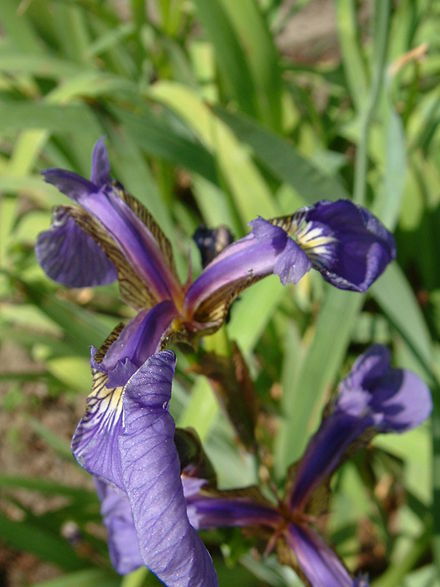

(1) Iris versicolor

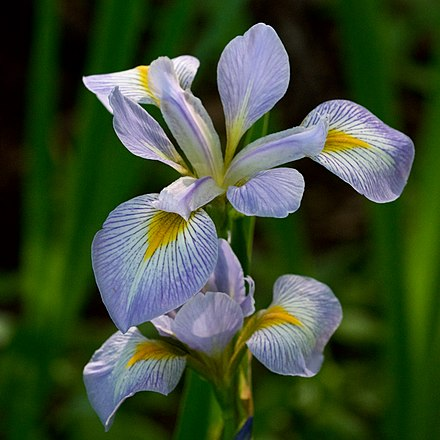

(2) Iris virginica

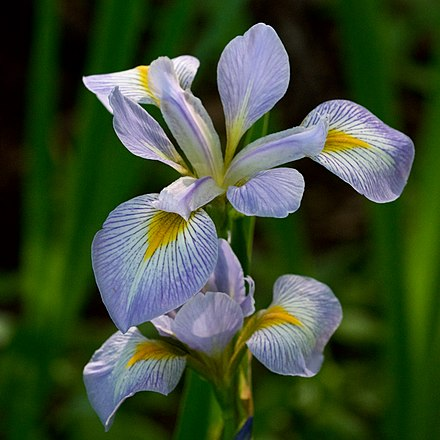

## 1.7.2 Measuring Success:  Training and Testing Data

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)

In [33]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


In [15]:
print("feature names:", iris_dataset['feature_names'])

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


C:\Users\Alex\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Alex\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Alex\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Alex\Anaconda3\lib\site-packages\pandas\plotting\_matplotli

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

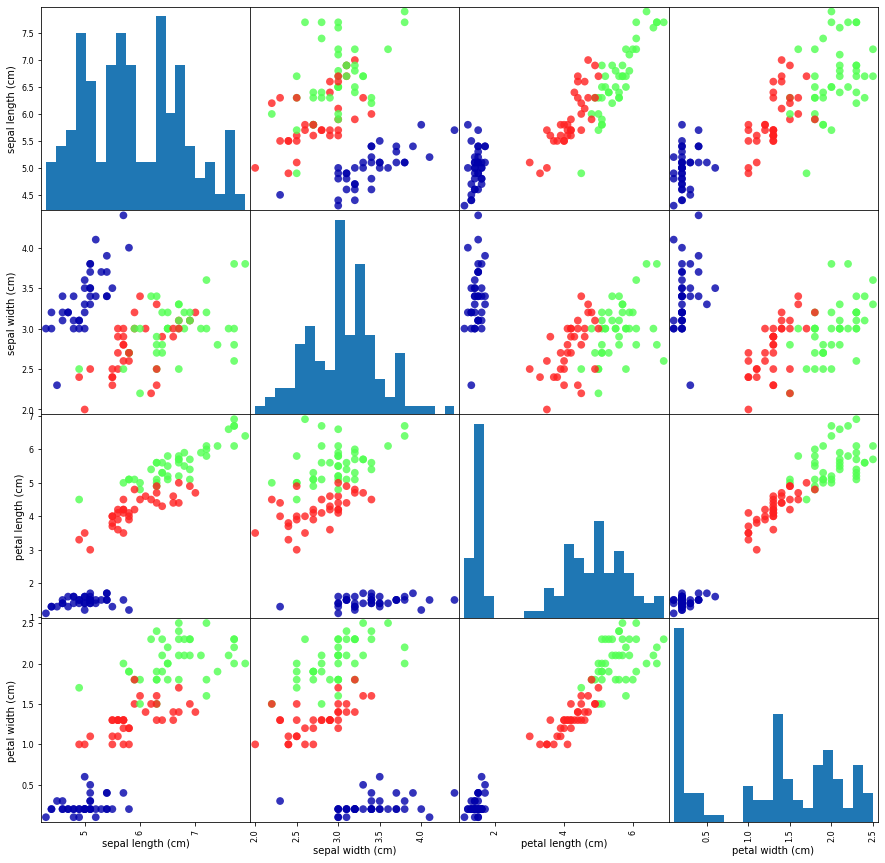

In [41]:
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o', hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)

## 1.7.4: Building Your First Model:  k-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

## 1.7.5: Making Predictions

In [56]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print(f'X_new.shape: {X_new.shape}')
prediction = knn.predict(X_new)
print(f'Prediction: {prediction}')
print(iris_dataset['target_names'][prediction])

X_new.shape: (1, 4)
Prediction: [0]
['setosa']


## 1.7.6: Evaluating the Model

## 1.8: Summary and Outlook